In [1]:
import pandas as pd
import geopandas as gpd
import os
%matplotlib inline
import matplotlib.pylab as plt
import choroplethNYC as cp

In [2]:
if os.getenv("PUIDATA") is None:
    os.environ["PUIDATA"] = "%s/PUIdata"%os.getenv("HOME")

In [3]:
url="https://data.cityofnewyork.us/resource/inaf-e6a5.json"
vac = pd.read_json(url)

In [4]:
vac.head()

,:@computed_region_92fq_4b7q,:@computed_region_efsh_h5xi,:@computed_region_f5dn_yrer,:@computed_region_sbqj_enih,:@computed_region_yeji_bk3q,a,address,borough,children,city,...,location_city,longitude,more_information,objectid,phone,service_category,service_type,walk_in,website,zip_code
0,32.0,11727.0,56.0,1.0,4.0,1,37 BROADWAY,Manhattan,No,NEW YORK,...,NEW YORK,-74.013032,Call location for hours,1,212-425-8460,Vaccines,Flu Vaccine (Influenza),Yes,https://www.walgreens.com/topic/duane-reade/du...,10006
1,32.0,11728.0,56.0,1.0,4.0,2,250 BROADWAY,Manhattan,No,NEW YORK,...,NEW YORK,-74.007475,Call location for hours,2,212-571-4511,Vaccines,Flu Vaccine (Influenza),Yes,https://www.walgreens.com/topic/duane-reade/du...,10007
2,50.0,12078.0,11.0,7.0,4.0,3,401 PARK AVE S,Manhattan,No,NEW YORK,...,NEW YORK,-73.984114,Call location for hours,3,212-213-9730,Vaccines,Flu Vaccine (Influenza),Yes,https://www.walgreens.com/topic/duane-reade/du...,10016
3,23.0,12422.0,20.0,15.0,4.0,301,2833 Broadway,Manhattan,No,Manhattan,...,Manhattan,-73.967019,Call location for hours,4,(212) 663-3135,Vaccines,Flu Vaccine (Influenza),Yes,https://www.riteaid.com/,10025
4,51.0,12080.0,11.0,8.0,4.0,4,1430 BROADWAY,Manhattan,No,NEW YORK,...,NEW YORK,-73.986927,Call location for hours,5,212-768-0201,Vaccines,Flu Vaccine (Influenza),Yes,https://www.walgreens.com/topic/duane-reade/du...,10018


In [5]:
vac_z = vac.groupby("zip_code")[['objectid']].count().reset_index()

In [6]:
vac_z.head()

,zip_code,objectid
0,10001,11
1,10002,8
2,10003,17
3,10004,2
4,10005,3


In [7]:
vac_z = vac_z.rename(columns={"objectid":"location_number"})

In [8]:
zipcode = gpd.GeoDataFrame.from_file(os.getenv("PUIDATA") + "/ZIP_CODE_040114.shp")

In [9]:
zipcode = zipcode.to_crs(epsg=2263)

In [10]:
zipcode['ZIPCODE']=zipcode['ZIPCODE'].astype(int)

In [11]:
vaczip = zipcode.merge(vac_z, right_on='zip_code',left_on='ZIPCODE')

In [12]:
vaczip.head()

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry,zip_code,location_number
0,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1001613.712964058 186926.4395171576,...",11213,5
1,11212,0,Brooklyn,83866.0,4.197210e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1011174.275535807 183696.3377096516,...",11212,8
2,11225,0,Brooklyn,56527.0,2.369863e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995908.3654508896 183617.6128014964,...",11225,4
3,11218,0,Brooklyn,72280.0,3.686880e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((991997.113430889 176307.4958600698, ...",11218,5
4,11226,0,Brooklyn,106132.0,3.940860e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((994821.4729396414 177865.7178092472,...",11226,10


Text(0.5,1,'Number of Locations Providing Seasonal Flu Vaccinations within NYC by zipcode')

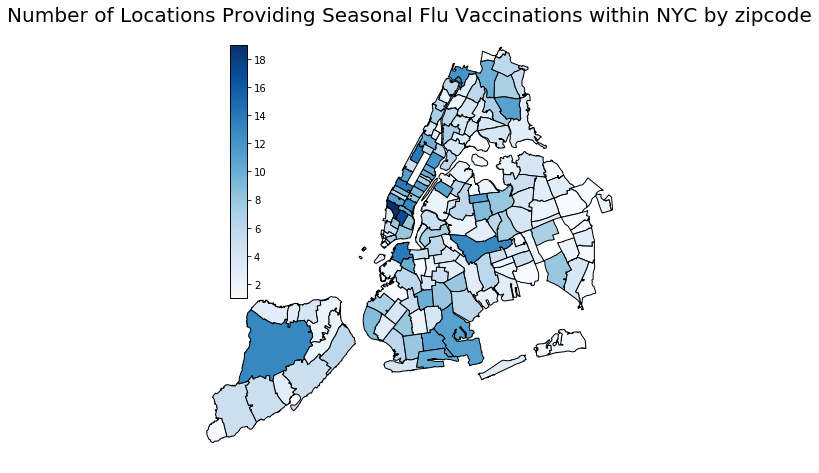

In [13]:
f, ax= plt.subplots(figsize=(8,8))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.axes.set_aspect('equal', 'datalim')
cp.choroplethNYC(vaczip, color='white', column='location_number',edgecolor='black',cmap ='Blues', ax=ax, )
ax.set_title("Number of Locations Providing Seasonal Flu Vaccinations within NYC by zipcode", fontsize=20)

## Figure1: This plot indicates number of locations providing seasonal flu vaccine in each zipcode in New York City.

## Based on the feedback I received from two peers, I've changed the cmap color of my choropleth so that readers won't be confused.